# DADOS

In [1]:
import pandas as pd
import numpy as np
import yellowbrick

In [2]:
df = pd.read_csv('data/flights.csv')
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271
...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


# VISUALIZACAO

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

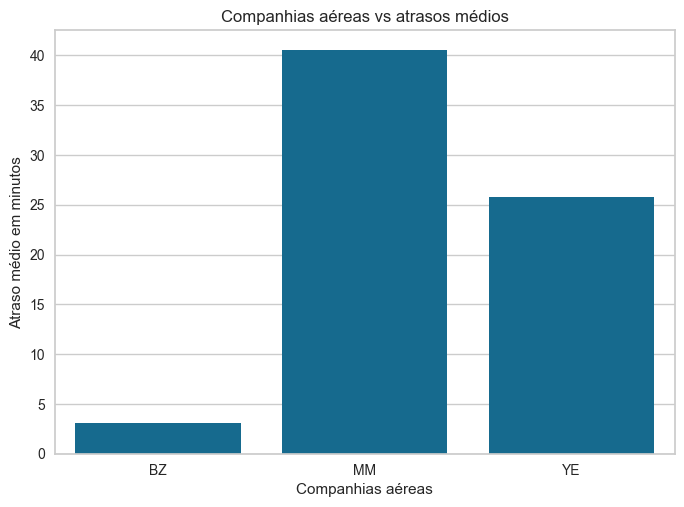

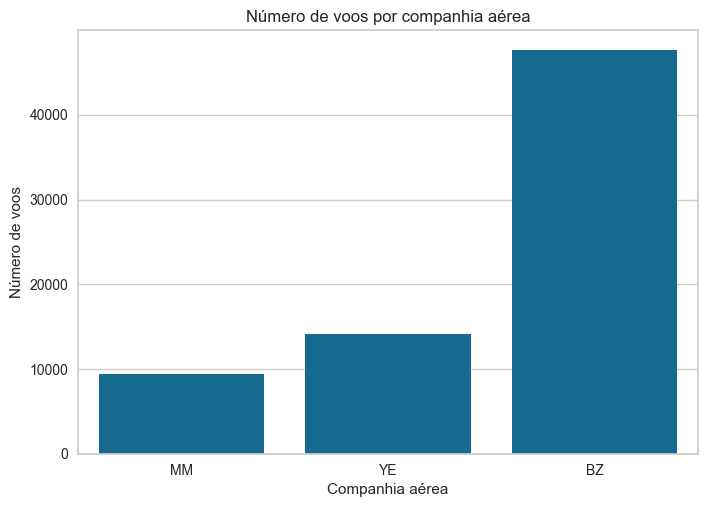

In [5]:
average_delay = df.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=df, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

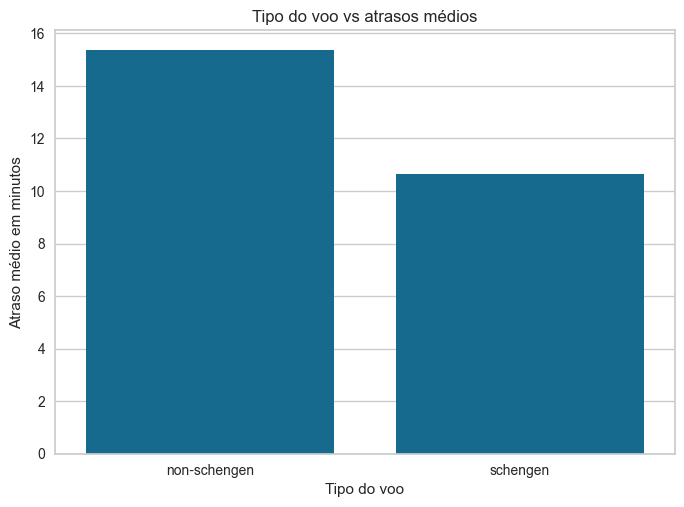

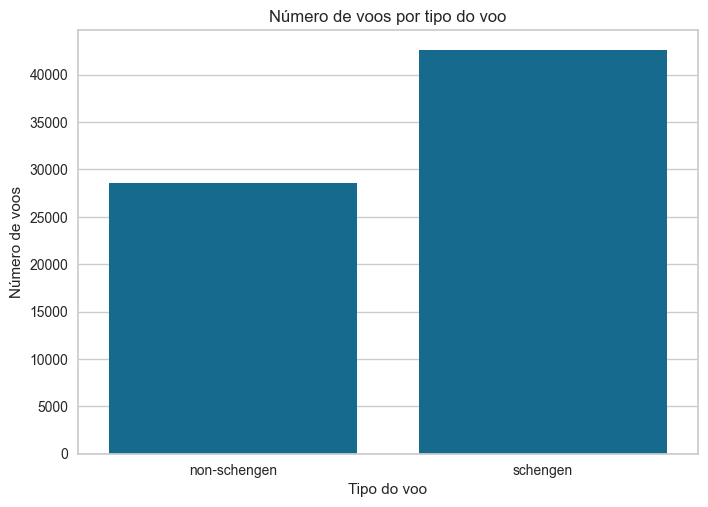

In [6]:
average_delay = df.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=df, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

In [7]:
sns.set_palette("deep")


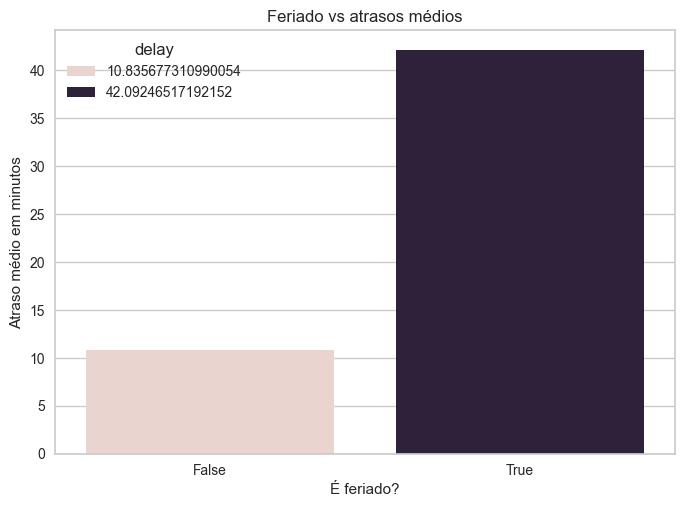

In [8]:
average_delay = df.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay',hue='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

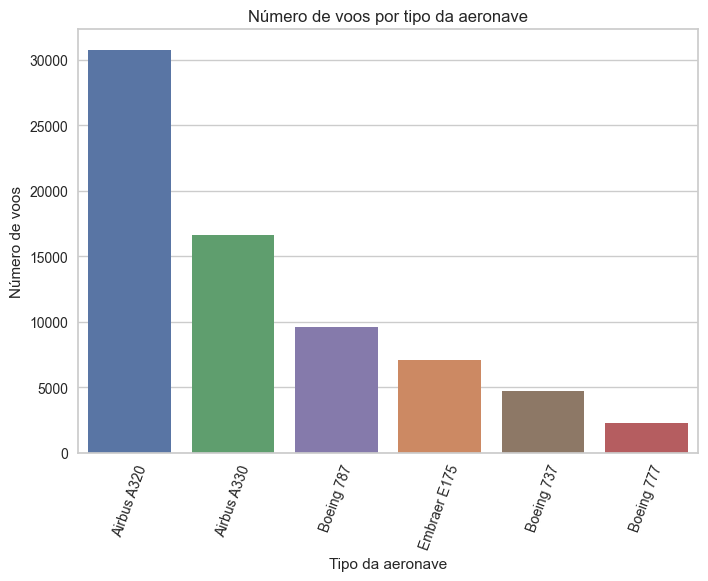

In [9]:
order = df['aircraft_type'].value_counts().index
sns.countplot(data=df, x='aircraft_type',hue='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

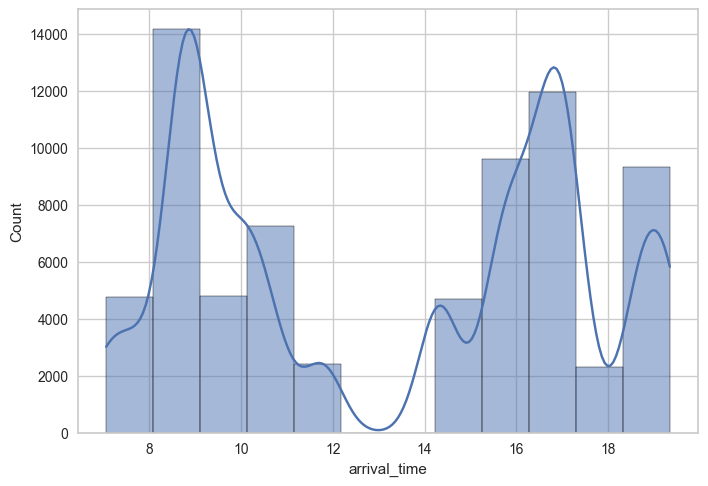

In [10]:
sns.histplot(data=df, x='arrival_time', kde=True, bins=12)

In [11]:
def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

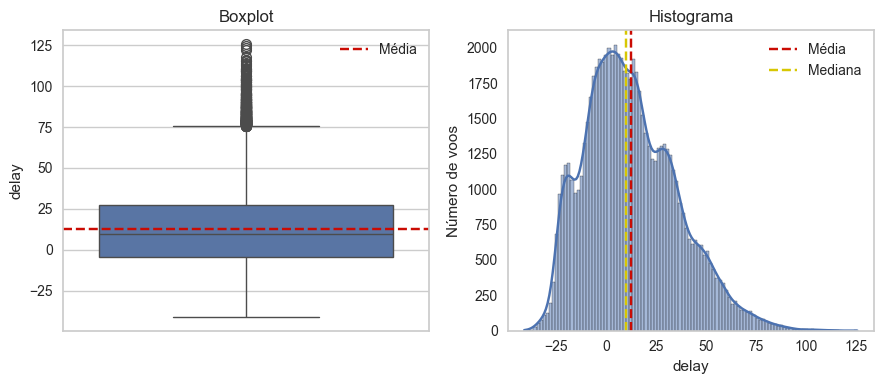

In [12]:
mean_delay = df['delay'].mean()
median_delay = df['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=df, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(df, 'delay')
sns.histplot(data=df, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

# TRATAMENTO DE DADOS

In [13]:
df.iloc[0]

flight_id                   26
airline                     MM
aircraft_type      Airbus A320
schengen          non-schengen
origin                     TCY
arrival_time          8.885071
departure_time       10.885071
day                          0
year                      2010
is_holiday               False
delay                70.205981
Name: 0, dtype: object

## DIA DA SEMANA

In [14]:
days = df['year'].astype(str)+'-'+(df['day']+1).astype(str)
print(days[0])

2010-1


In [15]:
df['date'] = pd.to_datetime(days,format='%Y-%j')
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31


In [16]:
df['is_weekend']=df['date'].dt.weekday.isin([5,6])
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31,True
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31,True
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31,True
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31,True


In [17]:
df['day_name']=df['date'].dt.day_name()
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31,True,Saturday
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31,True,Saturday
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31,True,Saturday
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31,True,Saturday


In [18]:
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [19]:
df['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [20]:
categorical = ['schengen', 'is_holiday', 'is_weekend']

for cat in categorical:
    df[cat]=df[cat].replace(
        {value: index for index, value in enumerate(df[cat].unique())}
    )
df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6060\616383213.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat]=df[cat].replace(


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1,Saturday
71171,17,BZ,Airbus A330,0,CNU,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1,Saturday
71172,7,MM,Boeing 787,1,TZF,8.564949,13.564949,364,2022,1,56.167080,2022-12-31,1,Saturday
71173,5,BZ,Airbus A320,1,ZQO,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1,Saturday


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  int64         
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  int64         
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  int64         
 13  day_name        71175 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)


In [22]:
object_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(data=df, columns=object_columns, dtype=int)
df

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,1,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1,...,0,1,0,0,0,1,0,0,0,0
71171,17,0,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1,...,0,0,0,0,0,1,0,0,0,0
71172,7,1,8.564949,13.564949,364,2022,1,56.167080,2022-12-31,1,...,0,1,0,0,0,1,0,0,0,0
71173,5,1,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1,...,0,0,1,0,0,1,0,0,0,0


## REMOVER VARIAVEIS DESNECESSÁRIAS

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int32         
 11  airline_MM                  71175 non-null  int32     

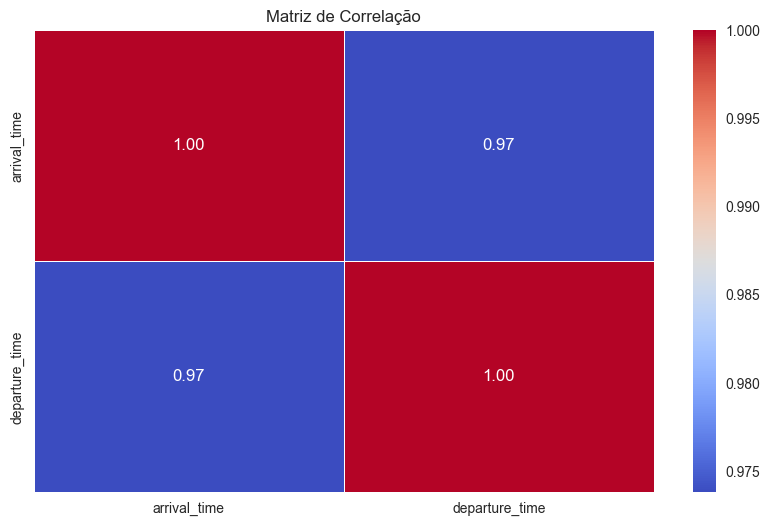

In [24]:
###Possuem uma corr quase perfeita, tornando desnecessario
# Calculando a matriz de correlação
correlation_matrix = df[['arrival_time', 'departure_time']].corr()

# Criando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Ajustando título
plt.title("Matriz de Correlação")

# Exibindo o gráfico
plt.show()

In [25]:
# REMOVAER DATAS POIS JA TEMOS O DIA DA SEMANA
# REMOVER IDS
# REMOVER CHEGADA
df = df.drop(columns=[
    'flight_id',
    'day',
    'year',
    'date',
    'departure_time'
])
df

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,18.635384,1,25.677277,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
71171,0,16.718722,1,52.624348,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
71172,1,8.564949,1,56.167080,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
71173,1,9.344097,1,56.758844,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


# TREINO E TESTE

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [27]:
y = df['delay']
x = df.drop(columns=(['delay']))

x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    train_size=0.8,
    random_state=412
)

In [28]:
def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

## DUMMY MODEL

In [29]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(x_train,y_train)

DummyRegressor()

In [30]:
pred_dummy=dummy.predict(x_test)
pred_dummy

array([12.57773996, 12.57773996, 12.57773996, ..., 12.57773996,
       12.57773996, 12.57773996])

In [31]:
calcular_metricas_regressao(y_test,pred_dummy)

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Raiz do Erro Quadrático Médio': 23.0738,
 'Erro Absoluto Médio': 18.4737,
 'R2 Score': -0.0}

## MODEL

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
model = RandomForestRegressor(
    max_depth=10,
    random_state=5343
)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=5343)

In [34]:
pred=model.predict(x_test)
pred

array([-17.96990651,   5.51074896,  11.53824246, ...,   1.82312781,
        10.77423592,  10.79941479])

In [35]:
calcular_metricas_regressao(y_test,pred)

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Raiz do Erro Quadrático Médio': 13.2583,
 'Erro Absoluto Médio': 10.644,
 'R2 Score': 0.6698}

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


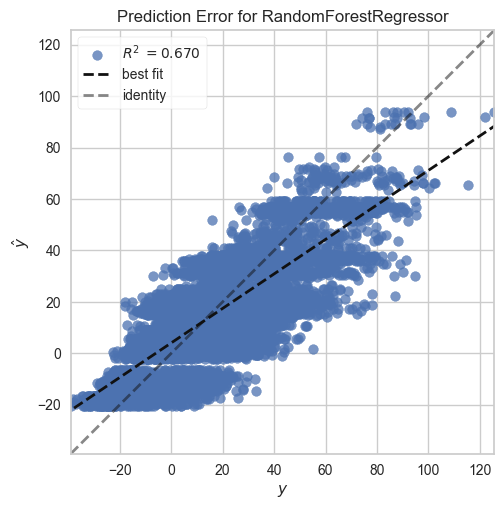

In [36]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model, x_train, y_train, x_test, y_test)

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


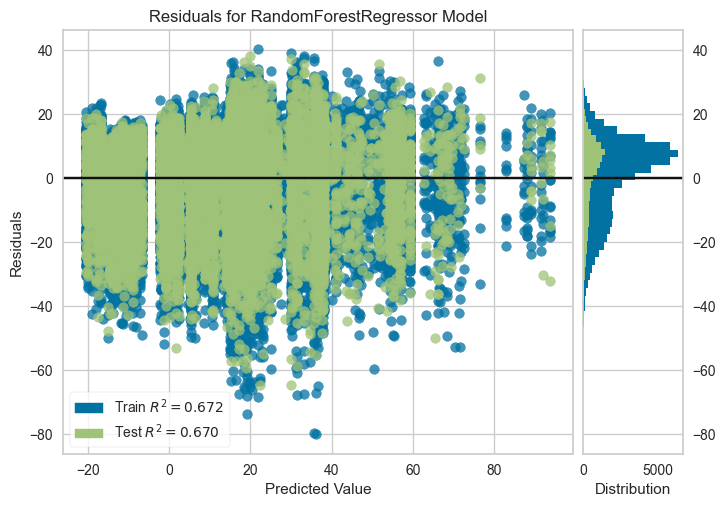

In [37]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, x_train, y_train, x_test, y_test)


# CROSS VALIDATION

In [38]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model,x_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([18.19791102, 16.82066202, 16.65053439, 13.17060447,  8.49978971]),
 'score_time': array([0.28744912, 0.30700159, 0.30791616, 0.15157652, 0.14130974]),
 'test_mae': array([-10.75014201, -10.63158005, -10.80957976, -10.68995616,
        -10.71328744]),
 'test_rmse': array([-13.46837584, -13.25160293, -13.4689086 , -13.22090615,
        -13.30946234]),
 'test_r2': array([0.66424784, 0.6708944 , 0.66200968, 0.66835241, 0.6710868 ])}

# MELHORANDO O MODELO

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


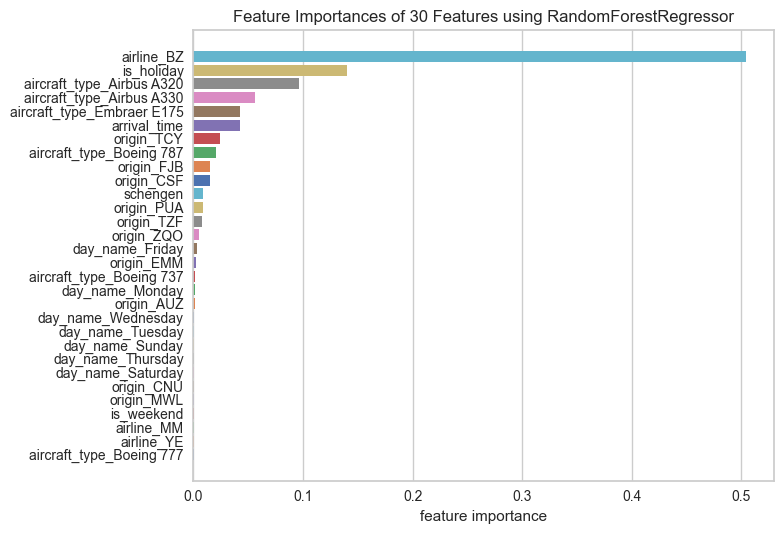

<Axes: title={'center': 'Feature Importances of 30 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [39]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model, relative=False)
viz.fit(x_train, y_train)
viz.show()

In [40]:
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importance})
importance_df.sort_values('Importance',ascending=False)

,Feature,Importance
4,airline_BZ,0.504680
2,is_holiday,0.139883
7,aircraft_type_Airbus A320,0.095893
8,aircraft_type_Airbus A330,0.055840
12,aircraft_type_Embraer E175,0.042602
1,arrival_time,0.042231
20,origin_TCY,0.024336
11,aircraft_type_Boeing 787,0.020491
17,origin_FJB,0.015367
15,origin_CSF,0.014941


In [41]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=245, max_depth=5)

for count in [1, 5, 10, 15, 20, 25, 30]:
    selected_features = importance_df['Feature'].values[:count]

    X_train_selected = x_train[selected_features]
    X_test_selected = x_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWa

,1,5,10,15,20,25,30
RMSE,22.9476,14.9326,14.354,13.7683,13.7640,13.7557,13.7560
MAE,18.4370,11.9840,11.539,11.0736,11.0696,11.0638,11.0642
R2,0.0109,0.5812,0.613,0.6439,0.6442,0.6446,0.6446


GRIDSEARCHCV

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 150, 200]
}

In [44]:
cv = KFold(n_splits=5, shuffle=True, random_state=65)

model_grid = GridSearchCV(
    RandomForestRegressor(random_state=654), 
    param_grid=param_grid, 
    scoring='r2', 
    cv=cv,
    n_jobs=-1
)

model_grid.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(model_grid.best_params_)
print(model_grid.best_score_)

In [ ]:
y_pred_model_grid = model_grid.predict(x_test)

metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

In [ ]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

# SALVAR MODELO

In [ ]:
import pickle

In [ ]:
with open('model/modelo_producao.pkl','wb') as file:
    pickle.dump(model_grid.best_estimator_, file)